In [1]:
# the following libraries will be used for the tasks of our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the CSV file
csv_df = pd.read_csv('cancer2017.csv', encoding='ISO-8859-1')

In [3]:
# Preview the data
csv_df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,,70,100,,60,280,,,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [4]:
csv_df.columns

Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [5]:
# Check columns in DataFrame
print("CSV DataFrame Columns:", csv_df.columns)

CSV DataFrame Columns: Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')


In [6]:
# Strip leading and trailing spaces from column names in the DataFrame
csv_df.columns = csv_df.columns.str.strip()

Plan:
# Reshape csv_df: We'll melt csv_df into a format where each row represents a state and one cancer type, making it possible to compare state-level data to national-level data from cancer_url.

In [7]:
# Reshape the csv_df DataFrame
reshaped_csv_df = pd.melt(csv_df, id_vars=['State'], var_name='Cancer Type', value_name='Cancer Data')

In [8]:
# Check the reshaped DataFrame to confirm it's in the desired format
reshaped_csv_df.head()

,State,Cancer Type,Cancer Data
0,Alabama,Brain/ nervous system,320
1,Alaska,Brain/ nervous system,
2,Arizona,Brain/ nervous system,380
3,Arkansas,Brain/ nervous system,180
4,California,Brain/ nervous system,1830


In [9]:
reshaped_csv_df

,State,Cancer Type,Cancer Data
0,Alabama,Brain/ nervous system,320
1,Alaska,Brain/ nervous system,
2,Arizona,Brain/ nervous system,380
3,Arkansas,Brain/ nervous system,180
4,California,Brain/ nervous system,1830
...,...,...,...
505,Virginia,Prostate,650
506,Washington,Prostate,620
507,West Virginia,Prostate,160
508,Wisconsin,Prostate,570


In [10]:
# Clean the 'Cancer Data' column to ensure all values are numeric
reshaped_csv_df['Cancer Data'] = pd.to_numeric(reshaped_csv_df['Cancer Data'], errors='coerce')


In [11]:
# Check for missing values and handle them
print(reshaped_csv_df.isna().sum())

State           0
Cancer Type     0
Cancer Data    72
dtype: int64


# The output shows that there are 63 missing values in the Cancer Data column, which indicates that some state-level data might be missing or improperly formatted.

We will be Filling the missing values with the Mean or Median. This is because we believe the missing data can be approximated by the average value

In [12]:
print(reshaped_csv_df['Cancer Type'].unique())

['Brain/ nervous system' 'Female breast' 'Colon & rectum' 'Leukemia'
 'Liver' 'Lung & bronchus' 'Non-Hodgkin Lymphoma' 'Ovary' 'Pancreas'
 'Prostate']


In [13]:
#standardize the cancer type columns
reshaped_csv_df['Cancer Type'] = reshaped_csv_df['Cancer Type'].str.strip().str.title()

In [14]:
# Check unique values in the columns to identify what type of missing data is present
for col in reshaped_csv_df.columns:
    print(f"{col}: {reshaped_csv_df[col].unique()}")

State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Cancer Type: ['Brain/ Nervous System' 'Female Breast' 'Colon & Rectum' 'Leukemia'
 'Liver' 'Lung & Bronchus' 'Non-Hodgkin Lymphoma' 'Ovary' 'Pancreas'
 'Prostate']
Cancer Data: [ 320.   nan  380.  180. 1830.  270.  190.   50. 1250.  490.  100.  610.
  350.  170.  250.  220.  280.  570.  330.   60.  110.  150.   80.  420.
   90.  910.  600.  640.  200.  260.  700. 1100.  130.  390.  410

In [15]:
# Recheck the dataframe
print(reshaped_csv_df.isna().sum())

State           0
Cancer Type     0
Cancer Data    72
dtype: int64


In [16]:
# Check the reshaped DataFrame to ensure everything is good
print(reshaped_csv_df.head())

        State            Cancer Type  Cancer Data
0     Alabama  Brain/ Nervous System        320.0
1      Alaska  Brain/ Nervous System          NaN
2     Arizona  Brain/ Nervous System        380.0
3    Arkansas  Brain/ Nervous System        180.0
4  California  Brain/ Nervous System       1830.0


In [17]:
# Verify the change
print(reshaped_csv_df.dtypes)

State           object
Cancer Type     object
Cancer Data    float64
dtype: object


In [18]:
# check information about data types 
print(reshaped_csv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        510 non-null    object 
 1   Cancer Type  510 non-null    object 
 2   Cancer Data  438 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.1+ KB
None


In [19]:
# check unique values in categorical variables
print("Unique Cancer Types:", reshaped_csv_df['Cancer Type'].nunique())

Unique Cancer Types: 10


In [20]:
# check for duplicates
print("Number of duplicate rows:", reshaped_csv_df.duplicated().sum())

Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

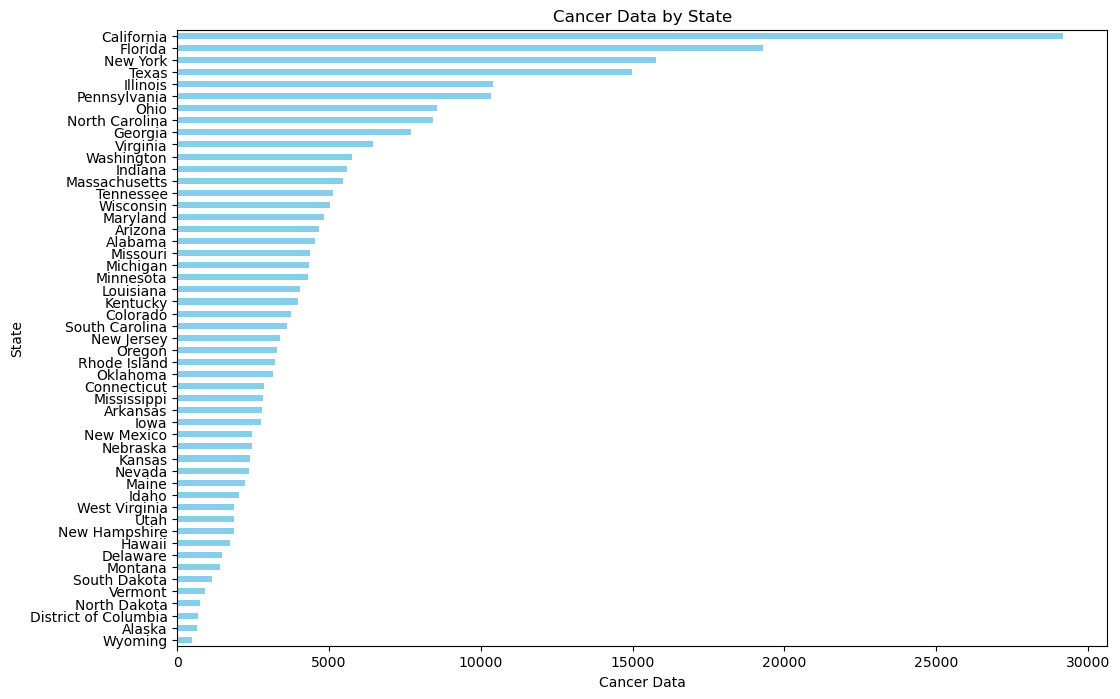

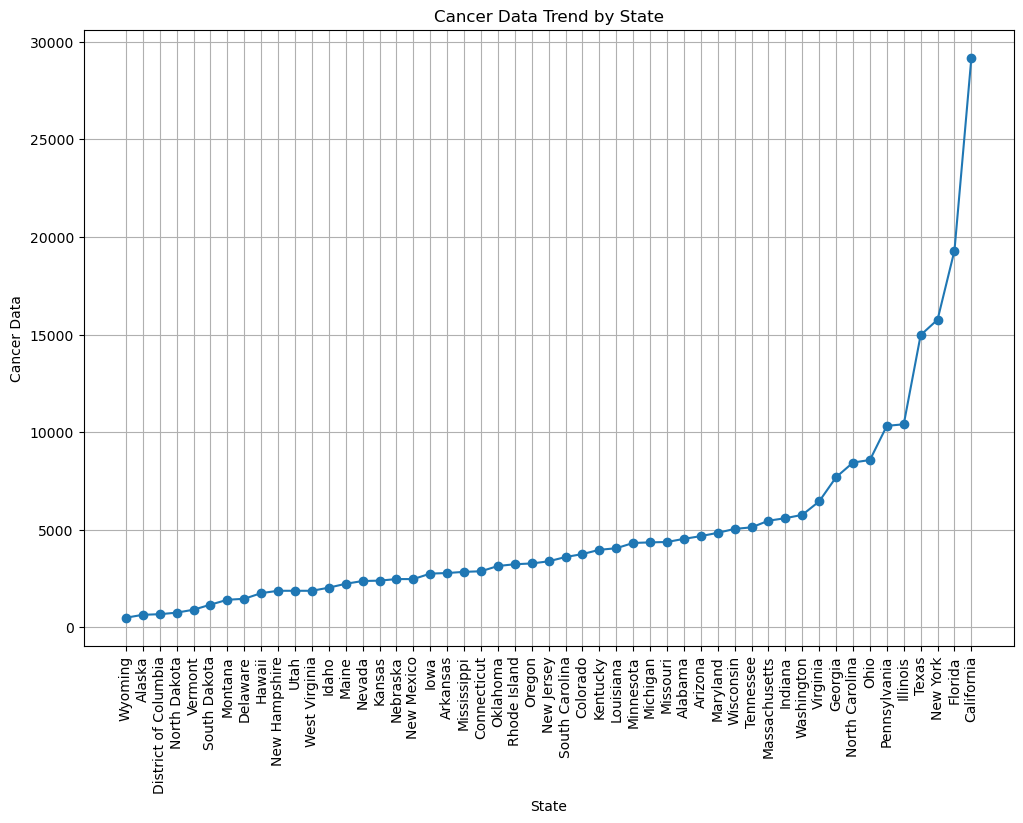

In [21]:
# plot a bar chart to visualize cancer data by state

state_data = reshaped_csv_df.groupby('State')['Cancer Data'].sum().sort_values()
state_data.plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title("Cancer Data by State")
plt.xlabel("Cancer Data")
plt.ylabel("State")

# save before show
plt.savefig("outputs/cancer_data_by_state_bar.png", dpi=300, bbox_inches="tight")

plt.show()
# Create a line graph to visualize cancer data by state

state_data = reshaped_csv_df.groupby('State')['Cancer Data'].sum().sort_values()

plt.figure(figsize=(12, 8))
plt.plot(state_data.index, state_data.values, marker='o')   # Line + markers
plt.title("Cancer Data Trend by State")
plt.xlabel("State")
plt.ylabel("Cancer Data")
plt.xticks(rotation=90)    # rotate names for clear view
plt.grid(True)             # adds guiding grid for better readability

# save before show
plt.savefig("outputs/cancer_data_trend_by_state_line.png", dpi=300, bbox_inches="tight")

plt.show()



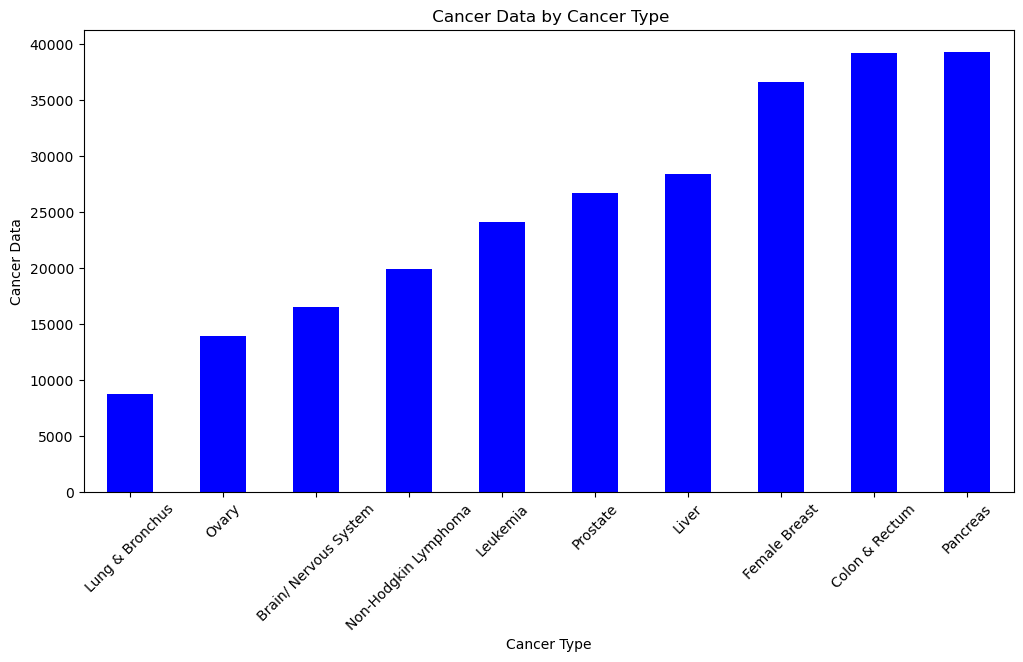

In [22]:
# distribution by cancer 

cancer_type_data = reshaped_csv_df.groupby('Cancer Type')['Cancer Data'].sum().sort_values()
cancer_type_data.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title(" Cancer Data by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Cancer Data")
plt.xticks(rotation=45)
plt.show()

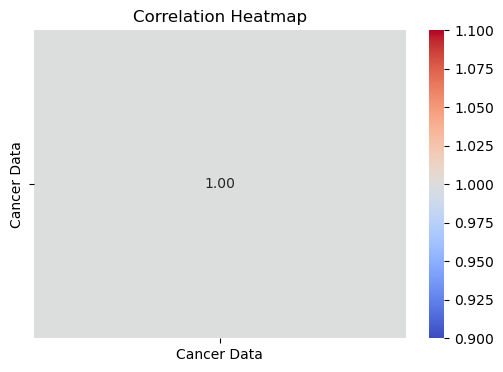

In [23]:
# Correlation heatmap
correlation = reshaped_csv_df[['Cancer Data', ]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

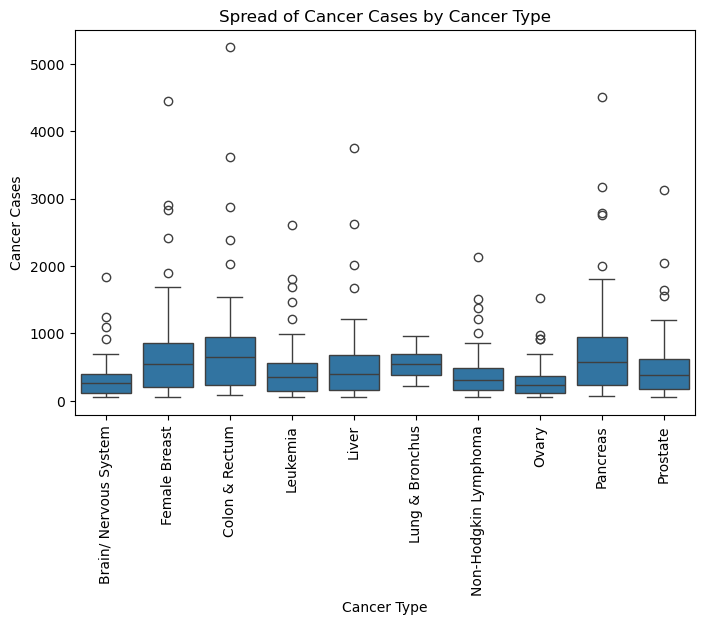

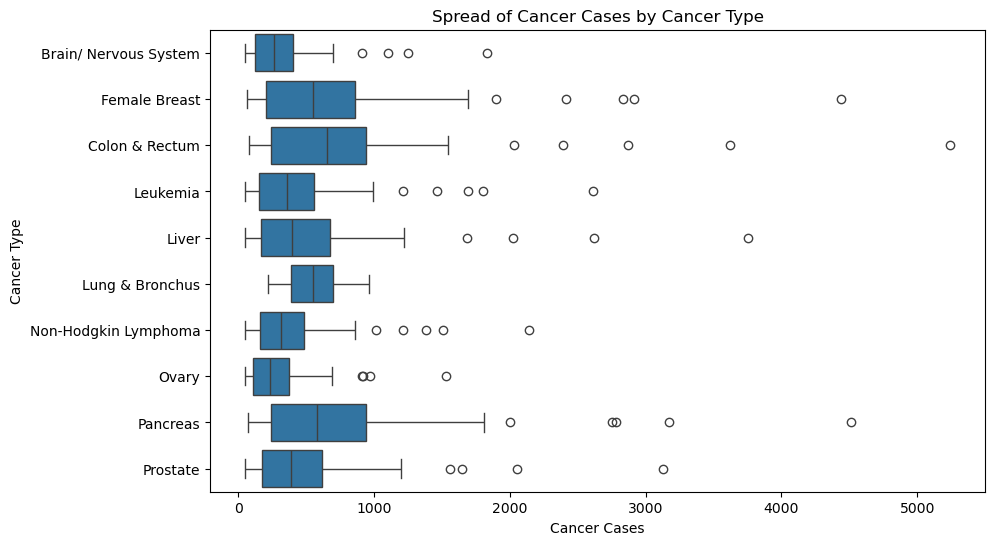

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=reshaped_csv_df, x='Cancer Type', y='Cancer Data')
plt.xticks(rotation=90)
plt.title('Spread of Cancer Cases by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Cancer Cases')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=reshaped_csv_df, y='Cancer Type', x='Cancer Data')
plt.title('Spread of Cancer Cases by Cancer Type')
plt.xlabel('Cancer Cases')
plt.ylabel('Cancer Type')
plt.show()


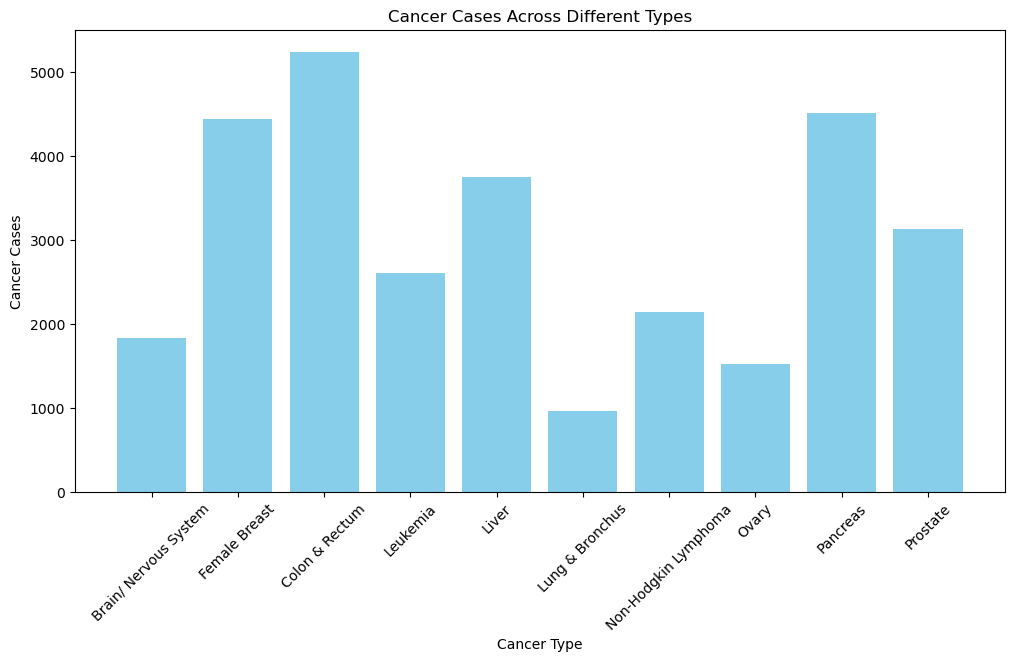

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(reshaped_csv_df['Cancer Type'], reshaped_csv_df['Cancer Data'], color='skyblue')

plt.xlabel('Cancer Type')
plt.ylabel('Cancer Cases')
plt.title('Cancer Cases Across Different Types')
plt.xticks(rotation=45)
plt.show()


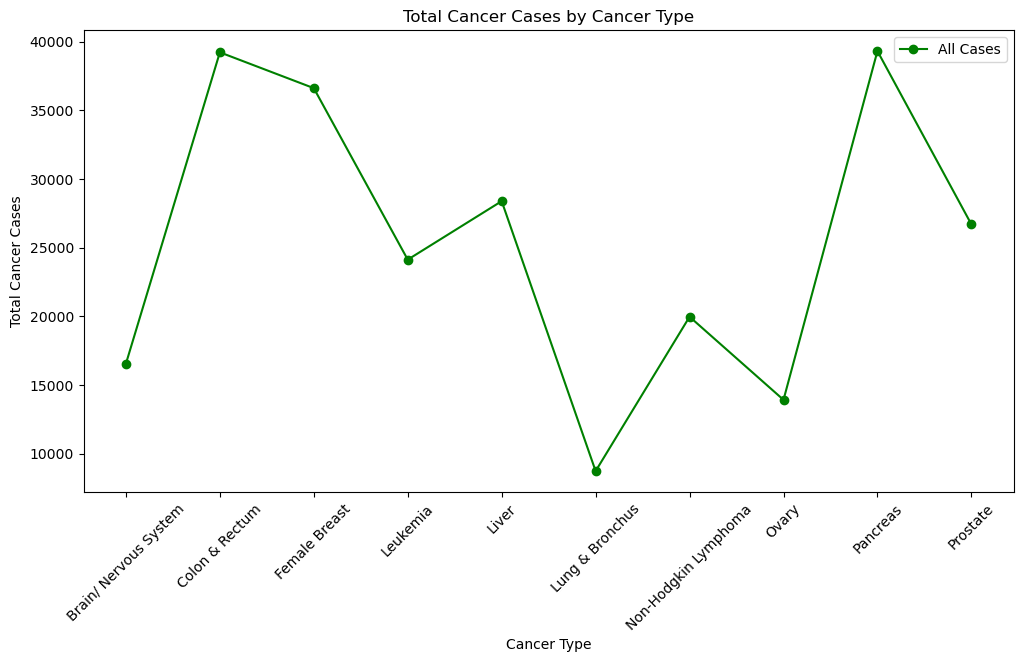

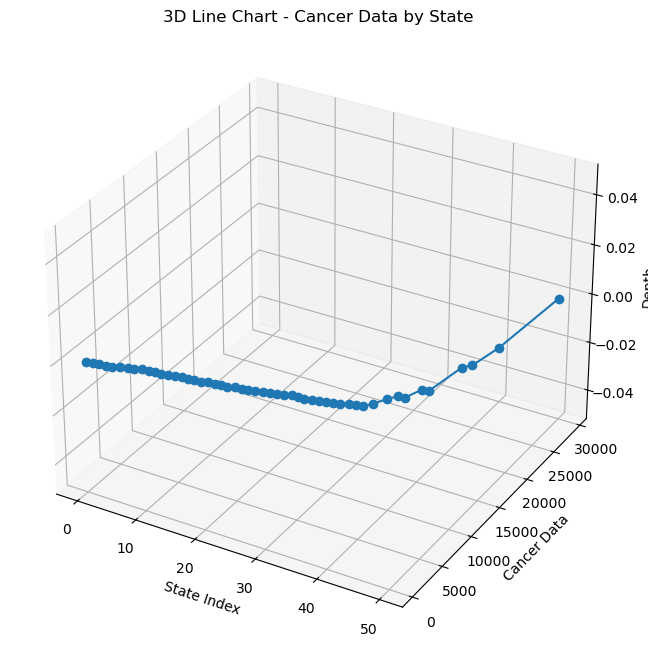

In [26]:
# Aggregate Cancer Data by Cancer Type
cancer_trends = reshaped_csv_df.groupby('Cancer Type')['Cancer Data'].sum()

plt.figure(figsize=(12, 6))
plt.plot(cancer_trends.index, cancer_trends.values, marker='o', linestyle='-', color='green', label='All Cases')

plt.xlabel('Cancer Type')
plt.ylabel('Total Cancer Cases')
plt.title('Total Cancer Cases by Cancer Type')
plt.xticks(rotation=45)
plt.legend()
plt.show()




# Group and sort data
state_data = reshaped_csv_df.groupby('State')['Cancer Data'].sum().sort_values()

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create x-axis positions for states
x = range(len(state_data))
y = state_data.values
z = [0] * len(state_data)  # base height = 0

ax.plot(x, y, zs=0, zdir='z', marker='o')  # Draw 3D line

# Labels
ax.set_title("3D Line Chart - Cancer Data by State")
ax.set_xlabel("State Index")
ax.set_ylabel("Cancer Data")
ax.set_zlabel("Depth")

# Show plot
plt.show()



In [27]:
# load the CSV file
csv_df = pd.read_csv('cancer2017.csv', encoding='ISO-8859-1')

csv_df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,,70,100,,60,280,,,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [28]:
import pandas as pd

# Replace † with 0
csv_df = csv_df.replace('†', '0')

# Remove commas and any non-digit characters, then convert to int
for col in csv_df.columns[1:]:
    # Remove commas, spaces, and non-digit characters
    csv_df[col] = csv_df[col].astype(str).str.replace(r'[^\d]', '', regex=True)
    # Convert empty strings to 0
    csv_df[col] = csv_df[col].replace('', '0')
    csv_df[col] = csv_df[col].astype(int)

csv_df.head()


,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,3200,320,250,710,450
1,Alaska,0,70,100,0,60,280,0,0,80,50
2,Arizona,380,810,1020,550,660,2820,430,310,930,600
3,Arkansas,180,420,600,250,280,2160,210,150,430,260
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,3130


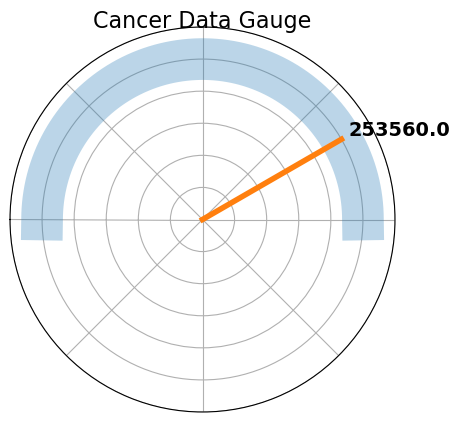

In [29]:


value = reshaped_csv_df['Cancer Data'].sum()  # total cancer count
max_value = value * 1.2  # Gauge upper bound (20% buffer)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': 'polar'})

# Convert value to angle (0 to π)
angle = (value / max_value) * np.pi

# Gauge background arc
theta = np.linspace(0, np.pi, 100)
r = np.ones(100)
ax.plot(theta, r, linewidth=30, alpha=0.3)

# Value pointer
ax.plot([0, angle], [0, 1], linewidth=4)

# Display text
ax.text(np.pi/2, 1.2, "Cancer Data Gauge", ha='center', fontsize=16)
ax.text(angle, 1.05, f"{value}", fontsize=14, fontweight='bold')

# Format gauge display
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(0, 1.2)
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)

plt.show()


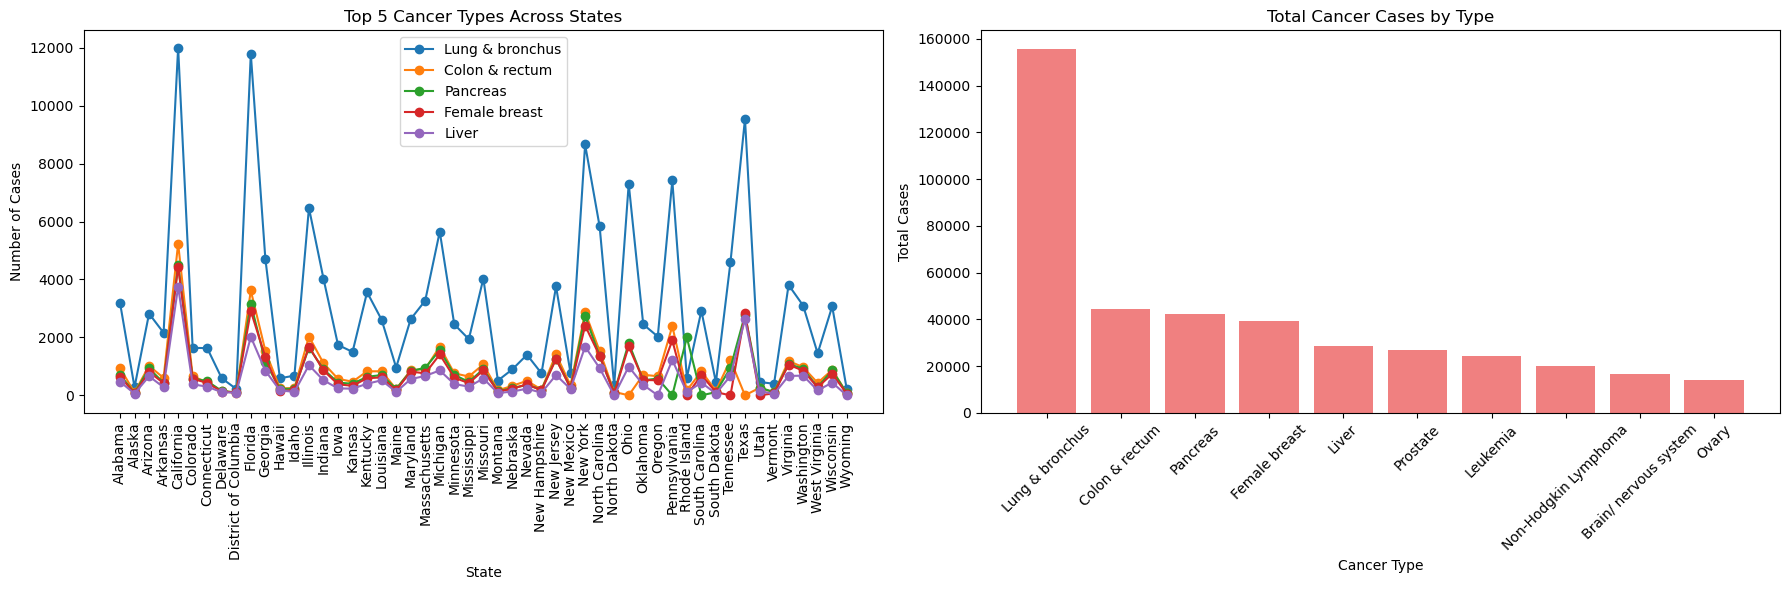

In [30]:
import matplotlib.pyplot as plt


total_by_type = csv_df.drop(columns=['State']).sum().sort_values(ascending=False)
top5_types = total_by_type.head(5).index  # Top 5 cancer types

line_data = csv_df[['State'] + list(top5_types)]
line_data.set_index('State', inplace=True)

# ---------------- Create subplots ----------------
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# ---- Left: Line Plot (trends by state) ----
for cancer in top5_types:
    axs[0].plot(line_data.index, line_data[cancer], marker='o', linestyle='-', label=cancer)

axs[0].set_xlabel('State')
axs[0].set_ylabel('Number of Cases')
axs[0].set_title('Top 5 Cancer Types Across States')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()

# ---- Right: Bar Plot (total cases by type) ----
axs[1].bar(total_by_type.index, total_by_type.values, color='lightcoral')
axs[1].set_xlabel('Cancer Type')
axs[1].set_ylabel('Total Cases')
axs[1].set_title('Total Cancer Cases by Type')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
# save before show
plt.savefig("outputs/chart_name.png", dpi=300, bbox_inches="tight")
plt.show()


In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

os.makedirs("outputs", exist_ok=True)

# Get columns from MultiIndex
site_type = merged_df[('Site/Type', 'Site/Type')].astype(str)

men_raw = merged_df[('Deaths', 'Men')].astype(str).str.replace(",", "", regex=False).str.strip()
women_raw = merged_df[('Deaths', 'Women')].astype(str).str.replace(",", "", regex=False).str.strip()

deaths_men = pd.to_numeric(men_raw, errors="coerce").fillna(0)
deaths_women = pd.to_numeric(women_raw, errors="coerce").fillna(0)

# REMOVE "All sites"
mask = site_type.str.lower().ne("all sites")
site_type = site_type[mask]
deaths_men = deaths_men[mask]
deaths_women = deaths_women[mask]

plt.figure(figsize=(14, 6))

# Men = blue, Women = pink
plt.bar(site_type, deaths_men, color="blue", alpha=0.85, label="Men")
plt.bar(site_type, deaths_women, bottom=deaths_men, color="pink", alpha=0.55, label="Women")

plt.title("Deaths by Site Type (Stacked for Men and Women)", fontsize=13)
plt.xlabel("Site Type", fontsize=11)
plt.ylabel("Number of Deaths", fontsize=11)

plt.xticks(rotation=90, fontsize=9)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.legend(loc="upper right", frameon=True)
plt.tight_layout()

# Save clean output
plt.savefig("outputs/deaths_by_site_type_stacked_clean_no_all_sites.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: outputs/deaths_by_site_type_stacked_clean_no_all_sites.png")


NameError: name 'merged_df' is not defined

In [ ]:
print(merged_df.columns)


In [ ]:
# Flatten multi-level columns
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Display the updated column names
print("Updated Columns:")
print(df.columns)

In [ ]:
# Remove footnotes like "a)" or "b)" in column names
df.columns = [col.replace("a)", "").replace("b)", "").strip() for col in df.columns]

# Verify the cleaned column names
print("Cleaned Columns After Footnote Removal:")
print(df.columns)

In [ ]:
df.columns = [
    col.replace('Site/Type Site/Type', 'Site/Type')
    .replace('New cases Both sexes', 'New cases - Both sexes')
    .replace('New cases Men', 'New cases - Men')
    .replace('New cases Women', 'New cases - Women')
    .replace('Deaths Both sexes', 'Deaths - Both sexes')
    .replace('Deaths Men', 'Deaths - Men')
    .replace('Deaths Women', 'Deaths - Women')
    .replace('Prevalent cases Both sexes', 'Prevalent cases - Both sexes')
    .replace('Prevalent cases Men', 'Prevalent cases - Men')
    .replace('Prevalent cases Women', 'Prevalent cases - Women')
    for col in df.columns
]

# Display cleaned column names
print("Cleaned Columns:")
print(df.columns)

In [ ]:
print(df.head())

In [ ]:
# Check for missing values
print("Missing Data Overview:")
print(df.isnull().sum())

In [ ]:
# Check for non-numeric values in the object columns
def identify_non_numeric_values(df, columns):
    non_numeric_entries = {}
    
    for col in columns:
        # Try to convert the column to numeric values and check for any NaNs
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Non-numeric will be NaN
        non_numeric_entries[col] = df[col].isna().sum()  # Count how many NaNs (non-numeric entries) are present

    return non_numeric_entries
    
# List of columns that should be numeric
numeric_columns = [
    'New cases - Men', 'New cases - Women',
    'Deaths - Men', 'Deaths - Women',
    'Prevalent cases - Men', 'Prevalent cases - Women'
]

# Identify non-numeric values in the specified columns
non_numeric_values = identify_non_numeric_values(df, numeric_columns)

# Print the non-numeric value counts
print("Non-Numeric Value Counts:")
print(non_numeric_values)

In [ ]:
# Function to investigate non-numeric entries in the specified columns
def investigate_non_numeric_entries(df, columns):
    for col in columns:
        # Check rows with NaN values (which were originally non-numeric)
        non_numeric_rows = df[df[col].isna()]
        print(f"\nNon-numeric entries in column '{col}':")
        print(non_numeric_rows[col])  # Print the non-numeric values

# Investigate the non-numeric entries in the problematic columns
investigate_non_numeric_entries(df, numeric_columns)

In [ ]:
df = df.dropna(subset=numeric_columns)

# Check the updated DataFrame
print(df[numeric_columns])

In [ ]:
# Check the data types after cleaning
print("Data Types After Cleaning:")
print(df.dtypes)

In [ ]:
# Assuming you have already parsed the HTML content with BeautifulSoup:
tables = soup.find_all('table')

# Extract Table 2 (second table in the list)
table_2 = tables[1]  # The second table is indexed as 1

# Extract rows from Table 2
rows_table_2 = table_2.find_all('tr')
table_data_2 = []

for row in rows_table_2:
    cells = row.find_all(['td', 'th'])
    cell_data = [cell.get_text(strip=True) for cell in cells]
    table_data_2.append(cell_data)

# Convert to DataFrame
df_table_2 = pd.DataFrame(table_data_2)

# Display the DataFrame for Table 2
print(df_table_2)

In [ ]:
# Assuming the data is already loaded into df_table_2
# Use the first row as column headers
df_table_2.columns = df_table_2.iloc[0]

In [ ]:
# Rename columns for clarity (optional)
df_table_2.columns = [
    "Site_Type",
    "Crude_Incidence_Both_Sexes",
    "Crude_Incidence_Men",
    "Crude_Incidence_Women",
    "Age_Standardized_Both_Sexes",
    "Age_Standardized_Men",
    "Age_Standardized_Women",
]

print("Cleaned DataFrame:")
print(df_table_2.head())

In [ ]:
# Check for missing data
print("Missing Data Overview for Table 2:")
print(df_table_2.isna().sum())

In [ ]:
# Check the data types for Table 2
print("Data Types for Table 2:")
print(df_table_2.dtypes)

In [ ]:
# List of numeric columns
numeric_columns = [
    "Crude_Incidence_Both_Sexes",
    "Crude_Incidence_Men",
    "Crude_Incidence_Women",
    "Age_Standardized_Both_Sexes",
    "Age_Standardized_Men",
    "Age_Standardized_Women",
]

# Convert numeric columns to float, coercing errors to NaN
df_table_2[numeric_columns] = df_table_2[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print("Data Types After Conversion:")
print(df_table_2.dtypes)

In [ ]:
# Drop rows with missing values
df_table_2.dropna(subset=["Age_Standardized_Women"], inplace=True)

In [ ]:
# Check for missing values
print("Missing Data Overview After Cleaning:")
print(df_table_2.isnull().sum())

In [ ]:
# Check data types
print("Data Types After Cleaning:")
print(df_table_2.dtypes)

In [ ]:
# Display rows with missing values in 'Crude_Incidence_Men' or 'Age_Standardized_Men'
missing_rows = df_table_2[df_table_2[['Crude_Incidence_Men', 'Age_Standardized_Men']].isnull().any(axis=1)]
print("Rows with Missing Values:")
print(missing_rows)

In [ ]:
# Replace NaN values in 'Crude_Incidence_Men' and 'Age_Standardized_Men' with 0
df_table_2.loc[df_table_2['Site_Type'].isin(['Cervix uteri', 'Corpus uteri', 'Ovary']),
               ['Crude_Incidence_Men', 'Age_Standardized_Men']] = 0

# Verify the changes
print("Rows After Fixing Missing Values:")
print(df_table_2[df_table_2['Site_Type'].isin(['Cervix uteri', 'Corpus uteri', 'Ovary'])])

In [ ]:
# Check for missing values
print("Missing Data Overview After Fix:")
print(df_table_2.isnull().sum())

In [ ]:
# Summary statistics for numeric columns
print("Descriptive Statistics:")
print(df_table_2.describe())

In [ ]:
# Count of unique site types
print("\nUnique Site Types:")
print(df_table_2['Site_Type'].nunique())

In [ ]:
# Align Column Names
df.rename(columns={"Site/Type": "Site_Type"}, inplace=True)
df_table_2.rename(columns={"Site/Type": "Site_Type"}, inplace=True)

In [ ]:
# Merge dataframes 
merged_df = pd.concat([df, df_table_2, reshaped_csv_df], axis=1)
print("Merged DataFrame shape:", merged_df.shape)

In [ ]:
merged_df.head()

In [ ]:
# Check for missing values
print("Missing Data Overview:")
print(merged_df.isnull().sum())

In [ ]:
print(merged_df.info())

In [ ]:
# Drop the row where 'Site_Type' is 'All sites'
df = df[df["Site_Type"] != "All sites"].reset_index(drop=True)

In [ ]:
# Drop the second occurrence of 'Site_Type' (column index 10)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Verify the cleaned DataFrame
print(merged_df.info())

In [ ]:
# Check the type of the object
print(type(merged_df))

In [ ]:
print(merged_df.columns)

In [ ]:
numerical_columns = merged_df.select_dtypes(include=['number']).columns.tolist()

print([col for col in numerical_columns if col not in merged_df.columns])

In [ ]:
# Drop the "All sites" row permanently
merged_df = merged_df[merged_df['Site_Type'] != 'All sites']

# Verify if the row is removed
print(merged_df.head())  # Check the first few rows

In [ ]:
merged_df['Site_Type'] = merged_df['Site_Type'].astype(str)

In [ ]:
merged_df = merged_df.dropna(subset=['Site_Type', 'New cases - Both sexes'])

In [ ]:
import os
import matplotlib.pyplot as plt

os.makedirs("outputs", exist_ok=True)

# Aggregate total cases by cancer type (both sexes)
site_data = reshaped_csv_df.groupby("Cancer Type")["Cancer Data"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(site_data.index, site_data.values, color="skyblue")

plt.xlabel("Cancer Type")
plt.ylabel("Total New Cases (Both Sexes)")
plt.title("New Cases for Both Sexes Across Different Site Types")

plt.xticks(rotation=45, ha="right")

# Save to outputs
plt.savefig("outputs/new_cases_both_sexes_site_types.png", dpi=300, bbox_inches="tight")

plt.show()

print("Saved: outputs/new_cases_both_sexes_site_types.png")


In [ ]:
#Stacked Bar Chart: Deaths by Sex

plt.figure(figsize=(12, 6))
plt.bar(merged_df['Site_Type'], merged_df['Deaths - Men'], color='blue', alpha=0.7, label='Men')
plt.bar(merged_df['Site_Type'], merged_df['Deaths - Women'], color='pink', alpha=0.7, bottom=merged_df['Deaths - Men'], label='Women')

plt.xlabel('Site Type')
plt.ylabel('Number of Deaths')
plt.title('Deaths by Site Type (Stacked for Men and Women)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show() 

In [ ]:
#Boxplot: Distribution of Prevalent Cases

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['Prevalent cases - Men', 'Prevalent cases - Women']], palette=['blue', 'pink'])

plt.ylabel('Prevalent Cases')
plt.title('Distribution of Prevalent Cases by Sex')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'])
plt.show()


In [ ]:
# Line Plot: Age-Standardized Incidence Rate Trends
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Site_Type'], merged_df['Age_Standardized_Both_Sexes'], marker='o', linestyle='-', color='green', label='Both Sexes')
plt.plot(merged_df['Site_Type'], merged_df['Age_Standardized_Men'], marker='o', linestyle='--', color='blue', label='Men')
plt.plot(merged_df['Site_Type'], merged_df['Age_Standardized_Women'], marker='o', linestyle='--', color='pink', label='Women')

plt.xlabel('Site Type')
plt.ylabel('Age-Standardized Incidence Rate')
plt.title('Age-Standardized Incidence Rate Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(merged_df.columns)

In [ ]:
# Pie Chart: Distribution of Total Deaths by Sex
plt.figure(figsize=(6, 6))
total_deaths = [merged_df['Deaths - Men'].sum(), merged_df['Deaths - Women'].sum()]
labels = ['Men', 'Women']
colors = ['blue', 'pink']

plt.pie(total_deaths, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Deaths by Sex')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()

# Create clustered heatmap
sns.clustermap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(8, 8)
)

plt.suptitle("Clustered Correlation Heatmap", y=1.02, fontsize=14)
plt.show()


In [ ]:
print(merged_df.info())

In [ ]:
# Bar Chart: New Cases by Site Type (Men vs. Women)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Site_Type'], merged_df['New cases - Men'], color='blue', alpha=0.6, label='Men')
plt.bar(merged_df['Site_Type'], merged_df['New cases - Women'], color='pink', alpha=0.6, label='Women')

plt.xlabel('Site Type')
plt.ylabel('New Cases')
plt.title('New Cases by Site Type (Men vs. Women)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save the merged dataset as a CSV file
both_table_df.to_csv('both_table_df.csv', index=False)

print("The new dataset has been saved successfully!")

In [ ]:
import os
print(os.getcwd())


In [ ]:
import os
print(os.listdir())


In [ ]:
import os

os.makedirs("outputs", exist_ok=True)
print("Current folder:", os.getcwd())
print("Files here:", os.listdir())


In [ ]:
import matplotlib.pyplot as plt
import os

os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(4,3))
plt.plot([1,2,3], [1,4,9])
plt提醒 = "Test Plot"
plt.title("Test Plot")
plt.savefig("outputs/test.png", dpi=300, bbox_inches="tight")
plt.show()

print("Outputs folder contains:", os.listdir("outputs"))


Saved: outputs\top10_states.png


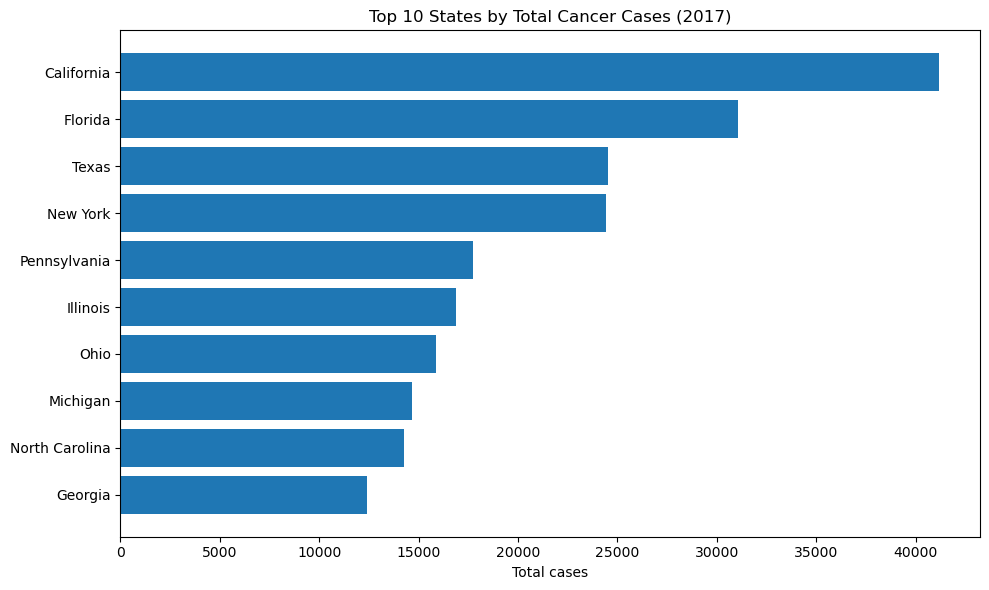

Saved: outputs\bottom10_states.png


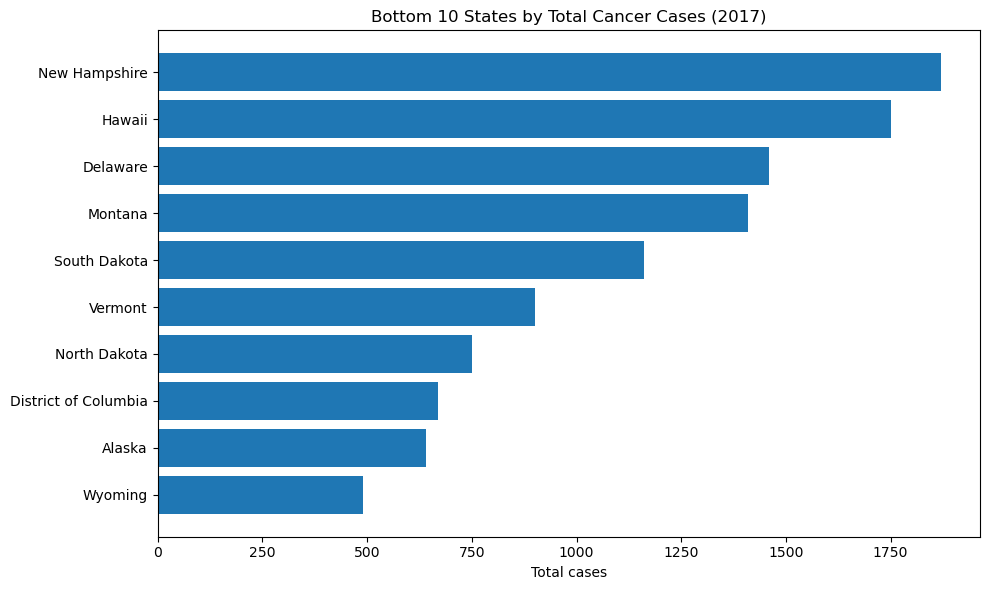

Saved: outputs\cases_by_type.png


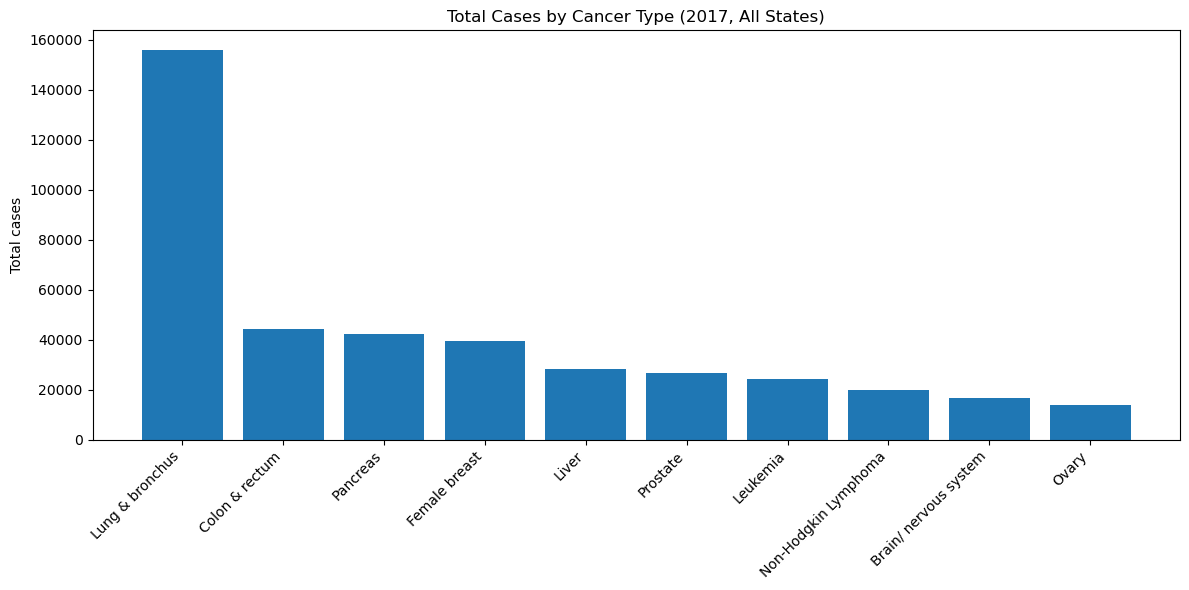

Saved: outputs\top_types_in_top_states.png


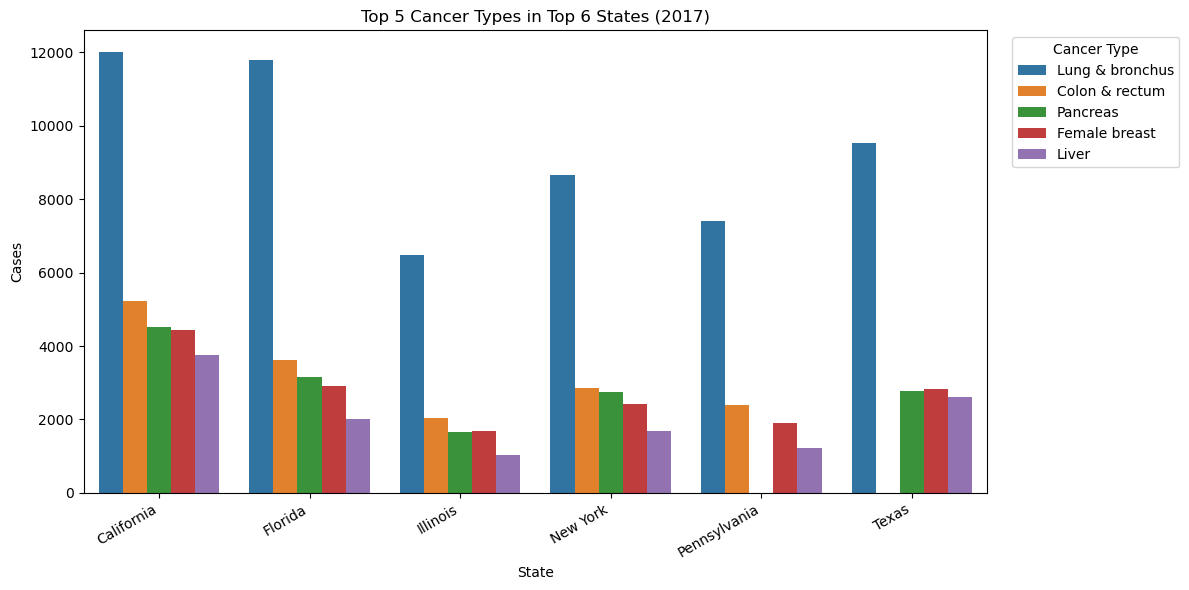

Saved: outputs\cancer_type_correlation.png


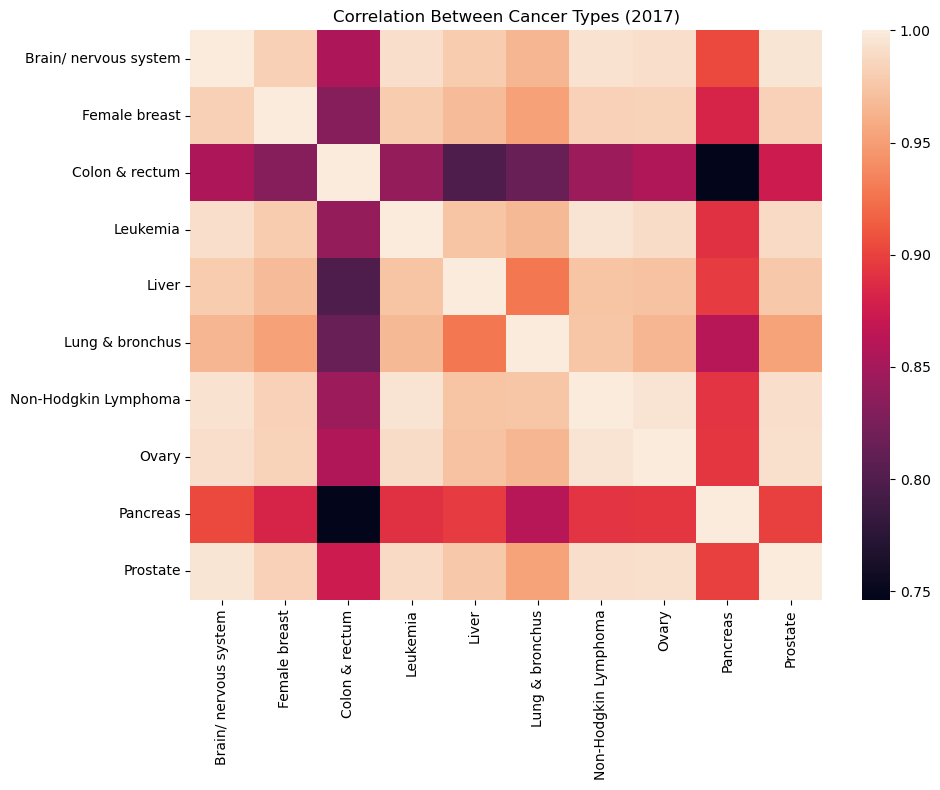

Done. Files now in outputs:
['outputs\\bottom10_states.png', 'outputs\\cancer_data_by_state_bar.png', 'outputs\\cancer_data_trend_by_state.png', 'outputs\\cancer_data_trend_by_state_line.png', 'outputs\\cancer_type_correlation.png', 'outputs\\cases_by_type.png', 'outputs\\chart_name.png', 'outputs\\deaths_by_site_type_stacked.png', 'outputs\\deaths_by_site_type_stacked_clean.png', 'outputs\\deaths_by_site_type_stacked_clean_no_all_sites.png', 'outputs\\new_cases_both_sexes_site_types.png', 'outputs\\state_totals.csv', 'outputs\\test.png', 'outputs\\top10_states.png', 'outputs\\top_types_in_top_states.png', 'outputs\\type_totals.csv']


In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("outputs", exist_ok=True)

df = pd.read_csv("cancer2017.csv", encoding="ISO-8859-1")
df.columns = [str(c).strip() for c in df.columns]
df = df.replace("†", 0)

df["State"] = df["State"].astype(str).str.strip()

numeric_cols = [c for c in df.columns if c != "State"]
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(",", "", regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

df["Total"] = df[numeric_cols].sum(axis=1)

state_totals = df[["State", "Total"]].sort_values("Total", ascending=False).reset_index(drop=True)
type_totals = df[numeric_cols].sum(axis=0).sort_values(ascending=False)

def save_plot(filename):
    path = os.path.join("outputs", filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print("Saved:", path)
    plt.show()

# Top 10 states
top10 = state_totals.head(10).sort_values("Total", ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(top10["State"], top10["Total"])
plt.title("Top 10 States by Total Cancer Cases (2017)")
plt.xlabel("Total cases")
save_plot("top10_states.png")

# Bottom 10 states
bottom10 = state_totals.tail(10).sort_values("Total", ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(bottom10["State"], bottom10["Total"])
plt.title("Bottom 10 States by Total Cancer Cases (2017)")
plt.xlabel("Total cases")
save_plot("bottom10_states.png")

# Cases by type
plt.figure(figsize=(12, 6))
plt.bar(type_totals.index.astype(str), type_totals.values)
plt.title("Total Cases by Cancer Type (2017, All States)")
plt.ylabel("Total cases")
plt.xticks(rotation=45, ha="right")
save_plot("cases_by_type.png")

# Top 5 types in top 6 states
top_types = type_totals.head(5).index.tolist()
top_states = state_totals.head(6)["State"].tolist()

subset = df[df["State"].isin(top_states)][["State"] + top_types].copy()
long_df = subset.melt(id_vars="State", var_name="Cancer Type", value_name="Cases")

plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x="State", y="Cases", hue="Cancer Type")
plt.title("Top 5 Cancer Types in Top 6 States (2017)")
plt.xlabel("State")
plt.ylabel("Cases")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.02, 1), loc="upper left")
save_plot("top_types_in_top_states.png")

# Correlation heatmap
type_df = df[numeric_cols].copy()
nonzero_cols = [c for c in type_df.columns if type_df[c].sum() != 0]
type_df = type_df[nonzero_cols]
corr = type_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False)
plt.title("Correlation Between Cancer Types (2017)")
save_plot("cancer_type_correlation.png")

# Export tables for Excel
state_totals.to_csv("outputs/state_totals.csv", index=False)
type_totals.reset_index().rename(columns={"index": "Cancer Type", 0: "Total Cases"}).to_csv(
    "outputs/type_totals.csv", index=False
)

print("Done. Files now in outputs:")
import glob
print(glob.glob("outputs/*"))


In [ ]:
import os
print(os.listdir("outputs"))
